In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
200,201,15604482,Chiemezie,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
6039,6040,15768887,Hsing,597,Spain,Male,26,5,0.00,2,0,1,95159.13,0
3596,3597,15707199,Cooper,643,France,Male,36,0,148159.71,1,0,0,55835.66,0
63,64,15751208,Pirozzi,684,Spain,Male,56,8,78707.16,1,1,1,99398.36,0
4008,4009,15612505,Joseph,835,Spain,Male,45,3,100212.13,1,1,0,152577.62,0


## This is a classification problem, where the goal is to predict whether a customer will churn (leave) or stay. Also, to find the factors that cause churn (e.g., poor service, high pricing, lack of engagement).

Usage: Help businesses retain customers by offering better services or personalized offers

In [4]:
# removing unnecessary rows

df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4775,526,Spain,Male,35,5,0.00,2,1,1,105618.14,0
5088,543,France,Male,42,4,89838.71,3,1,0,85983.54,1


In [5]:
df.shape

(10000, 11)

In [6]:
df.info() # indicates no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.duplicated().sum() #indicates no duplicate rows in the data

0

### 3.Data Preprocessing
Handle missing values (imputation or removal).
Encode categorical variables (One-Hot, Label Encoding).
Normalize/scale numerical data if needed.
Handle imbalanced data (SMOTE, undersampling, oversampling).
### 4. Exploratory Data Analysis (EDA)
Identify patterns, trends, and relationships in data.
Visualize class distribution, correlations, and feature importance.
Remove outliers and redundant features.
### 5. Feature Engineering
Select the most relevant features.
Create new meaningful features (feature transformation, interactions).
### 6. Model Selection & Training
Choose the right model:
Logistic Regression
Decision Tree
Random Forest
XGBoost
Deep Learning (if needed)
Split data into train-test-validation sets.
Train models and tune hyperparameters (GridSearch, RandomSearch).
### 7. Model Evaluation
Use classification metrics:
Accuracy
Precision & Recall
F1-score
ROC-AUC Curve
Confusion Matrix
### 8. Model Interpretation & Explainability
Identify key factors influencing predictions using:
SHAP (SHapley Additive Explanations)
Feature Importance
LIME (Local Interpretable Model-agnostic Explanations)


### Data Preprocessing

In [10]:
df.columns=[col.lower() for col in df.columns] # converting column names to lower case

In [11]:
# identify the no. of unique values in every column of the data
print("No. of unique values in every columns:\n")
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

No. of unique values in every columns:

creditscore : 460
geography : 3
gender : 2
age : 70
tenure : 11
balance : 6382
numofproducts : 4
hascrcard : 2
isactivemember : 2
estimatedsalary : 9999
exited : 2


In [12]:
# identify the unique values in less no. of unique values columns of the data
print("Unique values in less no. of unique values columns:\n")
cat_cols=[]

for col in df.columns[:-1]:
    if df[col].nunique()<5:
        print(f"{col} : {df[col].unique()}")
        cat_cols.append(col)
print(cat_cols)

# So, now, these are categorical columns

Unique values in less no. of unique values columns:

geography : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']
numofproducts : [1 3 2 4]
hascrcard : [1 0]
isactivemember : [1 0]
['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember']


In [13]:
df.exited.value_counts() 
# seems like an Imbalanced dataset, as it indicates that out of 10k rows, 7963 are 0(not exiting) and 2037 are 1(exiting)

exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df.exited.value_counts(normalize=True)*100
# seems like an Imbalanced dataset, as the percentage difference is almost 80:20 => 4:1

exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [15]:
# Firstly, need to balance the dataset using Oversampling 
# I am choosing Over-samlping, because I don't want to loose the data and the hidden patterns in it.

# Using Random Over-sampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

X=df.drop(['exited'],axis=1)
y=df[['exited']]

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the distribution of the resampled dataset
print(f"Original Class Distribution: {Counter(y)}")
print(f"Resampled Class Distribution: {Counter(y_resampled)}")

Original Class Distribution: Counter({'exited': 1})
Resampled Class Distribution: Counter({'exited': 1})


In [16]:
X_resampled.shape, y_resampled.shape

((15926, 10), (15926, 1))

In [17]:
# Combining both the X_resampled, y_resampled for making things easy and non-repeatable for both X and Y separately

df_resampled=pd.concat([X_resampled,y_resampled],axis=1)
df_resampled

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,677,Germany,Male,28,0,143988.00,2,1,0,8755.69,1
15922,704,Germany,Female,39,1,124640.51,1,1,0,116511.12,1
15923,418,France,Female,46,9,0.00,1,1,1,81014.50,1
15924,646,Germany,Male,32,8,105397.80,1,1,0,78111.84,1


In [18]:
# now checking the balance of the dateset

df_resampled.exited.value_counts() 

# now, the dataset is balanced and we are good to go

exited
1    7963
0    7963
Name: count, dtype: int64

In [19]:
df_resampled.exited.value_counts(normalize=True)*100
# now, the dataset is balanced and we are good to go

exited
1    50.0
0    50.0
Name: proportion, dtype: float64

## Explore the data

In [21]:
df=df_resampled

for i in cat_cols:
    print(df[i].value_counts(),"\n")
    # print(df[i].value_counts().plot(kind='bar'))

geography
France     7368
Germany    4877
Spain      3681
Name: count, dtype: int64 

gender
Male      8171
Female    7755
Name: count, dtype: int64 

numofproducts
1    9153
2    5609
3     933
4     231
Name: count, dtype: int64 

hascrcard
1    11176
0     4750
Name: count, dtype: int64 

isactivemember
0    8608
1    7318
Name: count, dtype: int64 



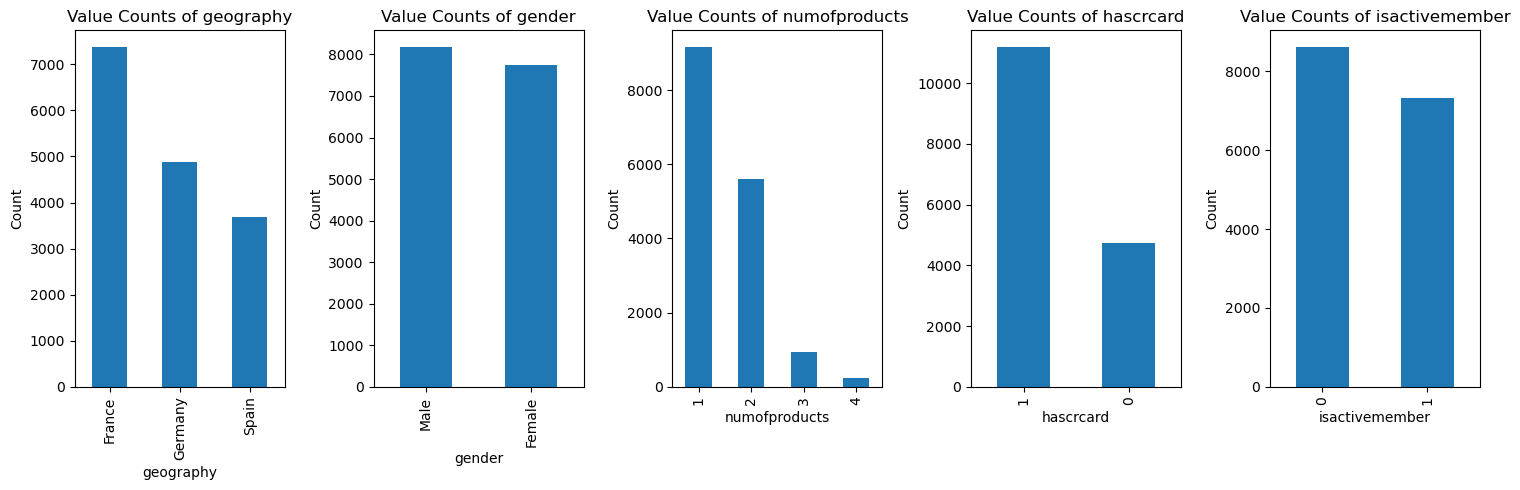

In [22]:
# Create subplots (adjust the number of rows and columns based on the number of variables)
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(15, 5))

# Loop through the columns and plot value counts
for i, column in enumerate(cat_cols):
    # Plot each categorical variable's value counts
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Value Counts of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
df.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [24]:
df.sample(2)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
8788,743,Germany,Female,35,1,146781.24,1,1,0,189307.7,0
10084,521,Germany,Male,52,5,116497.31,3,0,0,53793.1,1


In [25]:
num_cols=['creditscore','age','tenure','balance','estimatedsalary']
print("No. of unique values in Num_cols: \n")
for i in num_cols:
    print(i,':',df[i].nunique())


No. of unique values in Num_cols: 

creditscore : 460
age : 70
tenure : 11
balance : 6382
estimatedsalary : 9999


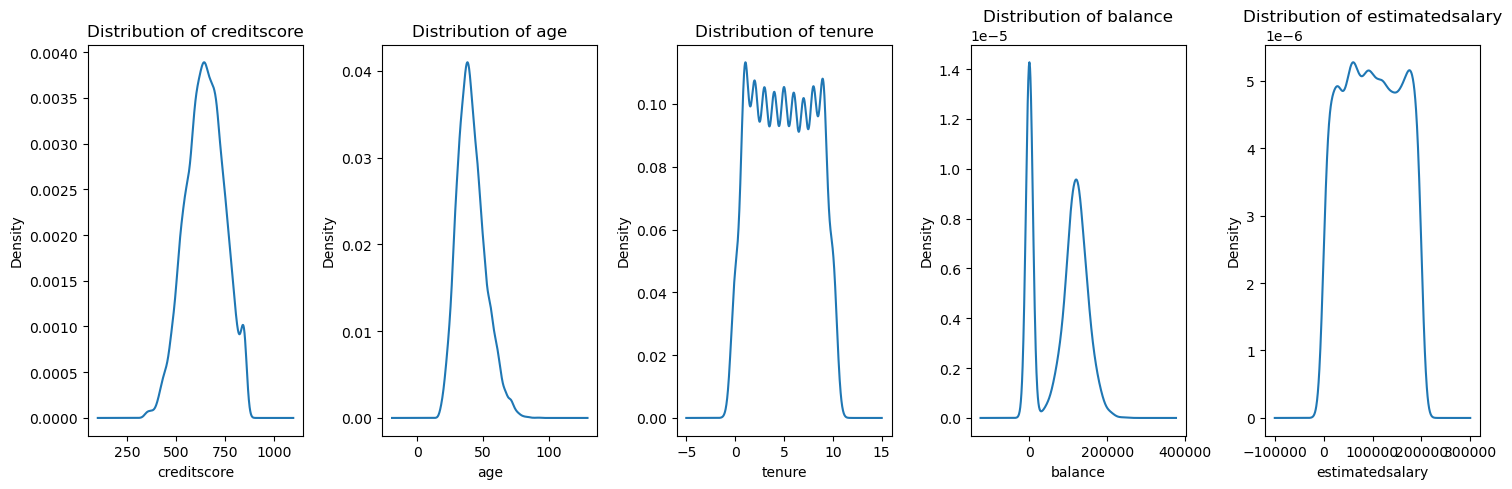

In [26]:
# Create subplots (adjust the number of rows and columns based on the number of variables)

fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

# Loop through the columns and plot value counts
for i, column in enumerate(num_cols):
    df[column].plot(kind='kde', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [27]:
round(df[num_cols].skew(),2)

creditscore       -0.10
age                0.61
tenure             0.02
balance           -0.28
estimatedsalary    0.01
dtype: float64

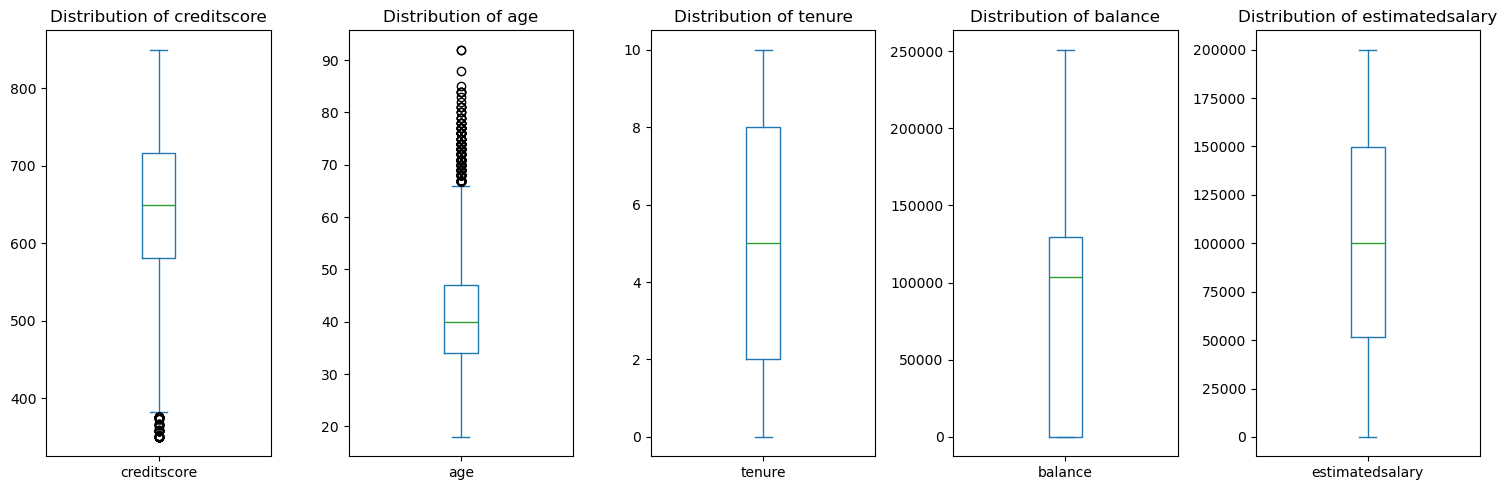

In [28]:
# Create subplots (adjust the number of rows and columns based on the number of variables)

fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

# Loop through the columns and plot value counts
for i, column in enumerate(num_cols):
    df[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### Outliers exists in Creditscore and Age

In [30]:
df.corr(numeric_only=True)['exited'].sort_values()

isactivemember    -0.190756
numofproducts     -0.046593
creditscore       -0.039442
hascrcard         -0.011803
tenure            -0.011141
estimatedsalary    0.010040
balance            0.154850
age                0.351546
exited             1.000000
Name: exited, dtype: float64

In [31]:
cat_cols

['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember']

Axes(0.125,0.11;0.775x0.77)


exited,0,1
geography,,
France,4204,3164
Germany,1695,3182
Spain,2064,1617


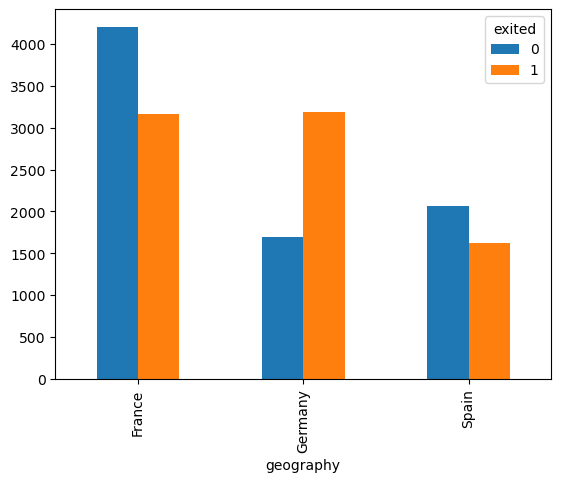

In [32]:
# sns.heatmap(x='geography',y='exited', data=df);
print(df.groupby(['geography','exited']).size().unstack().plot(kind='bar'))
df.groupby(['geography','exited']).size().unstack()

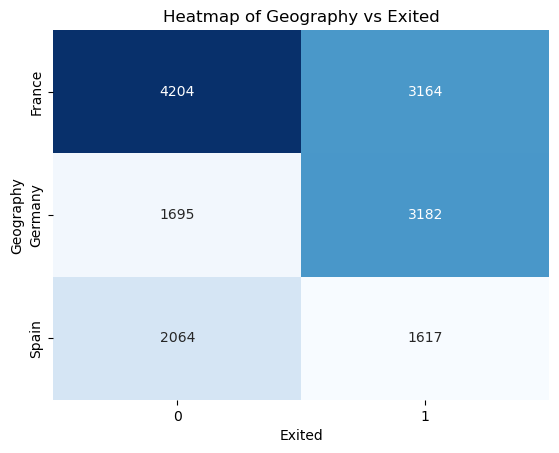

In [33]:
# Create a contingency table (cross-tab) between 'geography' and 'exited'
contingency_table = pd.crosstab(df['geography'], df['exited'])

# Create a heatmap of the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set plot labels and title
plt.title('Heatmap of Geography vs Exited')
plt.xlabel('Exited')
plt.ylabel('Geography')

# Display the plot
plt.show()


In [34]:
# From the above heat map, we can observe that customers in Germany are the most churning, then comes France people in Churning

Axes(0.125,0.11;0.775x0.77)


exited,0,1
gender,,
Female,3404,4351
Male,4559,3612


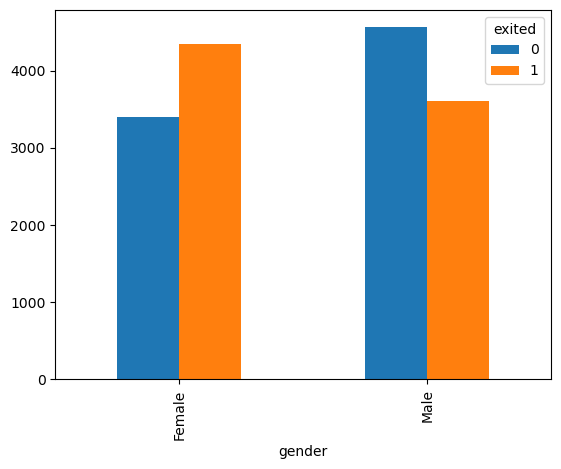

In [35]:
print(df.groupby(['gender','exited']).size().unstack().plot(kind='bar'))
df.groupby(['gender','exited']).size().unstack()

In [36]:
# From the above visualization, we can observe that mostly Females are leaving the company i.e. Churning

Axes(0.125,0.11;0.775x0.77)


exited               0     1
geography gender            
France    Female  1801  1760
          Male    2403  1404
Germany   Female   745  1703
          Male     950  1479
Spain     Female   858   888
          Male    1206   729

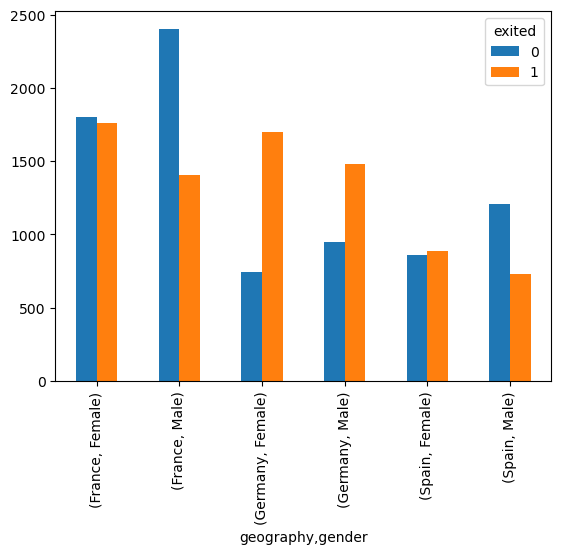

In [37]:
print(df.groupby(['geography','gender','exited']).size().unstack().plot(kind='bar'))
df.groupby(['geography','gender','exited']).size().unstack()

Axes(0.125,0.11;0.775x0.77)


exited,0,1
numofproducts,,
1,3675.0,5478.0
2,4242.0,1367.0
3,46.0,887.0
4,NaN,231.0


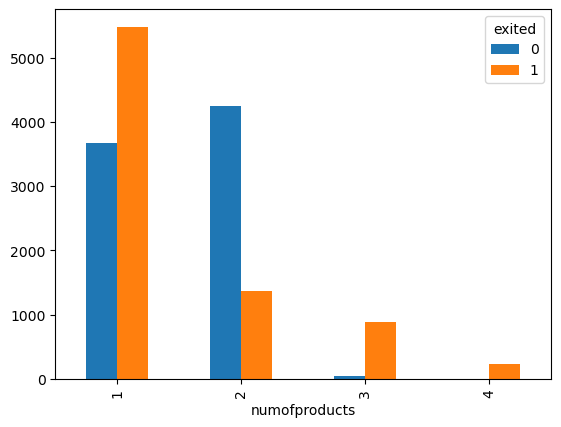

In [38]:
print(df.groupby(['numofproducts','exited']).size().unstack().plot(kind='bar'))
df.groupby(['numofproducts','exited']).size().unstack()

Axes(0.125,0.11;0.775x0.77)


exited,0,1
hascrcard,,
0,2332,2418
1,5631,5545


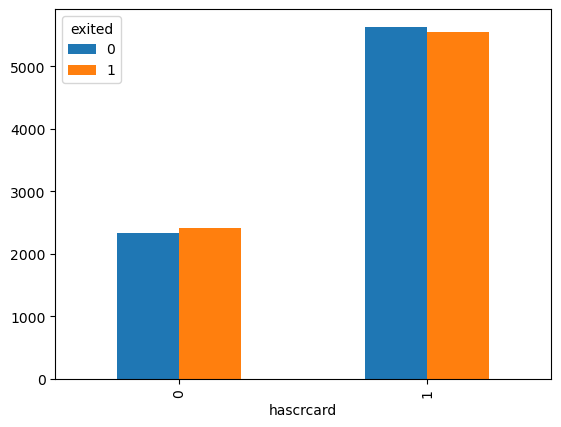

In [39]:
print(df.groupby(['hascrcard','exited']).size().unstack().plot(kind='bar'))
df.groupby(['hascrcard','exited']).size().unstack()

Axes(0.125,0.11;0.775x0.77)


exited,0,1
isactivemember,,
0,3547,5061
1,4416,2902


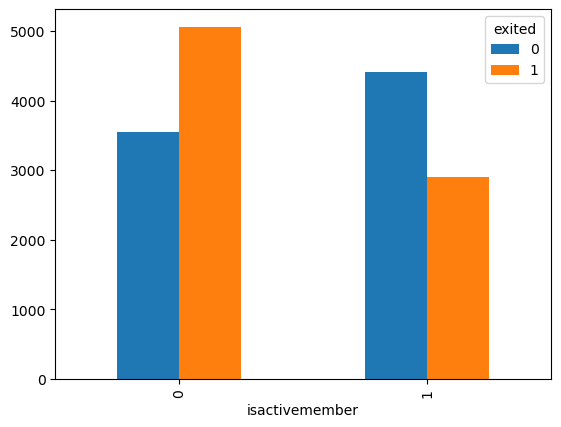

In [40]:
print(df.groupby(['isactivemember','exited']).size().unstack().plot(kind='bar'))
df.groupby(['isactivemember','exited']).size().unstack()

In [41]:
# From the above visualization, we can observe that mostly non-active members are leaving the company or Churning  

In [42]:
num_cols

['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

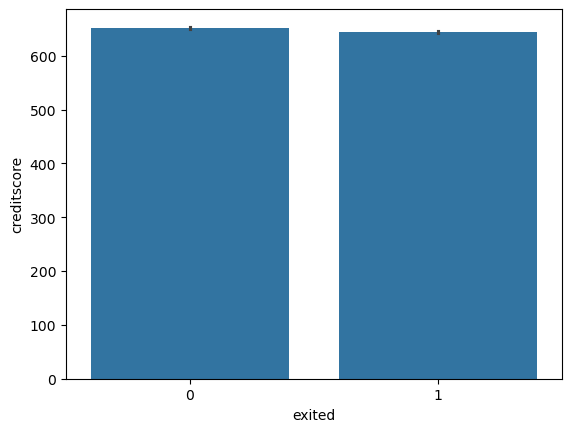

In [43]:
sns.barplot(y=df.creditscore,x=df.exited);

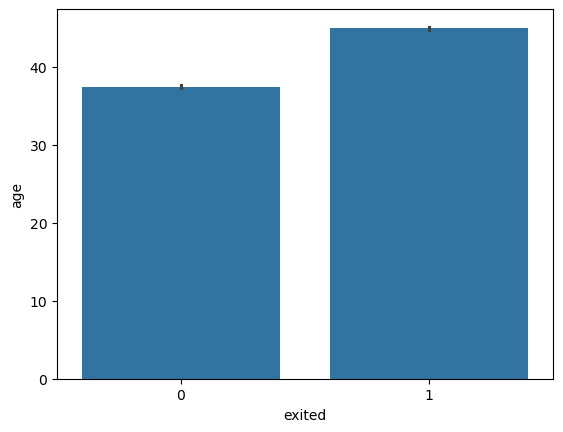

In [44]:
sns.barplot(y=df.age,x=df.exited);

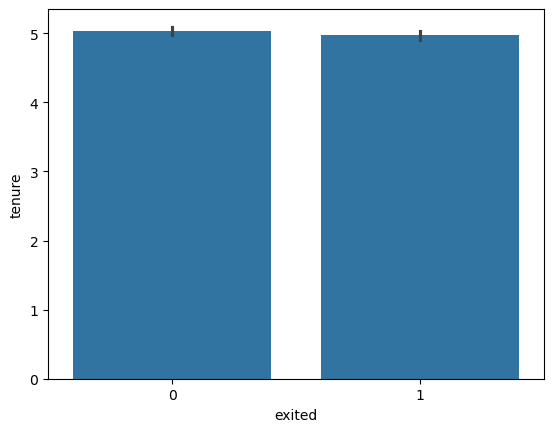

In [45]:
sns.barplot(y=df.tenure,x=df.exited);

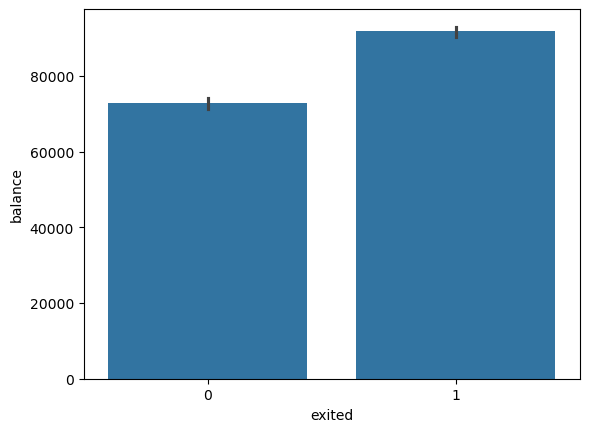

In [46]:
sns.barplot(y=df.balance,x=df.exited);

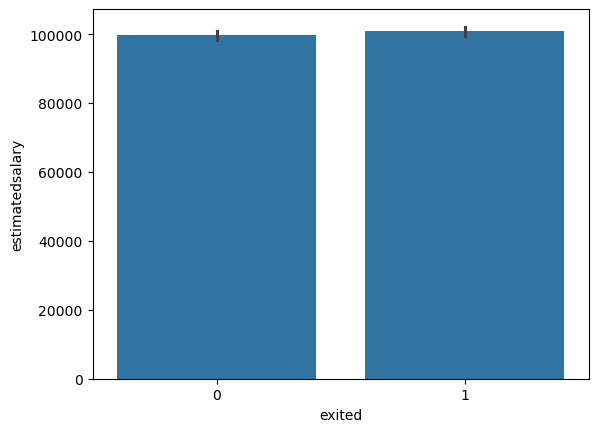

In [47]:
sns.barplot(y=df.estimatedsalary,x=df.exited);

In [48]:
df.shape

(15926, 11)

## Feature Engineering

### Creating new features from the exisitng features

In [50]:
df.sample(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
12463,629,France,Male,44,5,0.00,4,0,0,117572.59,1
14640,596,Germany,Male,48,2,131326.47,1,0,0,1140.02,1
4018,715,Germany,Female,32,3,104857.19,2,1,0,114149.80,0


In [51]:
round(df.describe(),2)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,15926.00,15926.00,15926.00,15926.00,15926.00,15926.00,15926.00,15926.00,15926.0
mean,647.99,41.14,5.00,82250.19,1.51,0.70,0.46,100315.93,0.5
std,97.84,10.62,2.93,61383.17,0.67,0.46,0.50,57526.95,0.5
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,581.00,34.00,2.00,0.00,1.00,0.00,0.00,51703.57,0.0
50%,649.00,40.00,5.00,103819.95,1.00,1.00,0.00,100075.10,0.5
75%,717.00,47.00,8.00,129335.65,2.00,1.00,1.00,149946.43,1.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [52]:
def credit_score_category(score):
    if score > 750:
        return "Excellent"
    elif score > 650:
        return "Good"
    elif score > 550:
        return "Fair"
    else:
        return "Poor"

df['credit_score_category'] = df['creditscore'].apply(credit_score_category)

df.sample(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,credit_score_category
3645,788,France,Male,55,3,0.00,1,0,1,13288.46,1,Excellent
13069,652,Germany,Male,46,10,121063.80,3,1,0,151481.86,1,Good
14075,665,Spain,Female,42,2,156371.61,2,0,1,156774.94,1,Good
1560,720,Germany,Female,43,10,110822.90,1,0,0,72861.94,0,Good
4120,666,Germany,Female,21,1,121827.43,2,1,1,99818.31,0,Good


Axes(0.125,0.11;0.775x0.77)


exited,0,1
credit_score_category,,
Excellent,1285,1174
Fair,2627,2703
Good,2798,2620
Poor,1253,1466


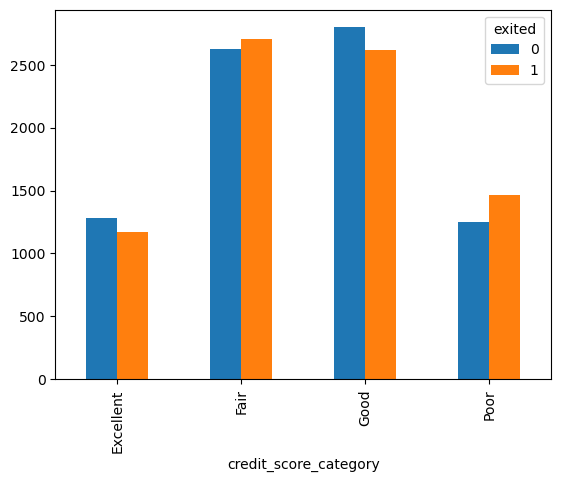

In [53]:
print(df.groupby(['credit_score_category','exited']).size().unstack().plot(kind='bar'))
df.groupby(['credit_score_category','exited']).size().unstack()

In [54]:
df['balance_to_salary_ratio'] = round(df['balance'] / df['estimatedsalary'],2)
df.sample(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,credit_score_category,balance_to_salary_ratio
13316,659,Spain,Female,42,2,0.00,1,0,0,162734.31,1,Good,0.00
5397,723,France,Female,40,7,142856.95,2,0,0,38019.74,0,Good,3.76
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,Fair,1.12


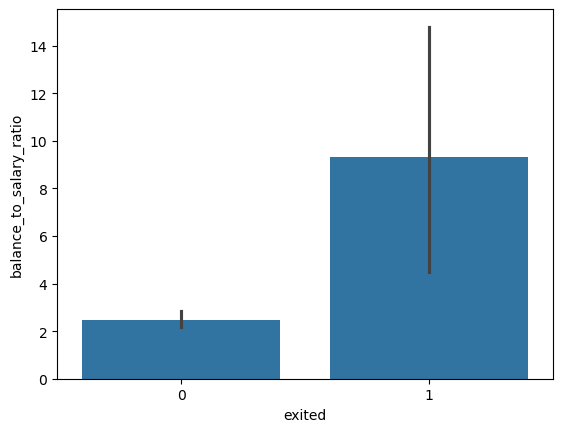

In [55]:
sns.barplot(x=df.exited, y=df.balance_to_salary_ratio);

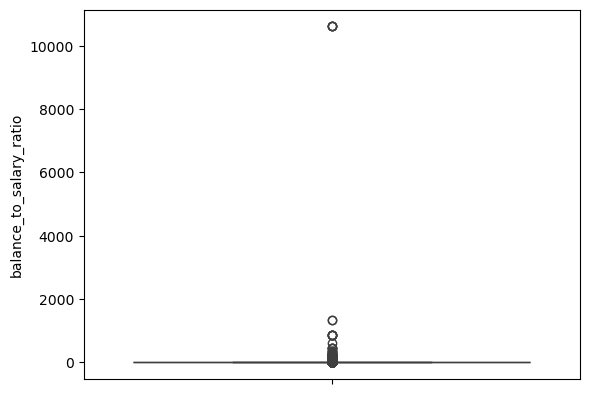

In [56]:
sns.boxplot(df.balance_to_salary_ratio);

In [57]:
df['balance_to_salary_ratio'].describe()

count    15926.000000
mean         5.908819
std        170.297941
min          0.000000
25%          0.000000
50%          0.810000
75%          1.630000
max      10614.660000
Name: balance_to_salary_ratio, dtype: float64

In [58]:
# balance_to_tenure_ratio
df['balance_to_tenure_ratio'] = round(df['balance'] / (df['tenure'] + 1),2)

# is_high_credit_low_balance
df['is_high_credit_low_balance'] = np.where((df['creditscore'] > 700) & (df['balance'] < (0.2 * df['estimatedsalary'])), 1, 0)
df.sample(4)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,credit_score_category,balance_to_salary_ratio,balance_to_tenure_ratio,is_high_credit_low_balance
7869,651,Spain,Female,45,8,95922.90,1,1,0,84782.42,1,Good,1.13,10658.10,0
7543,777,France,Male,43,1,0.00,2,1,0,21785.91,0,Excellent,0.00,0.00,1
14619,562,France,Male,37,2,0.00,1,0,1,52525.15,1,Fair,0.00,0.00,0
6368,663,Spain,Male,52,0,136298.65,1,1,0,144593.30,1,Good,0.94,136298.65,0


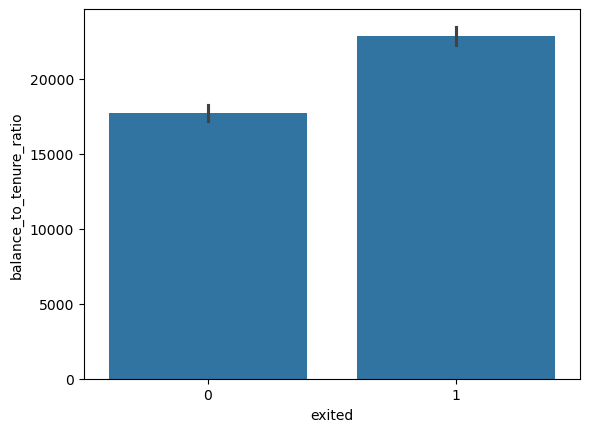

In [59]:
sns.barplot(x=df.exited, y=df.balance_to_tenure_ratio);

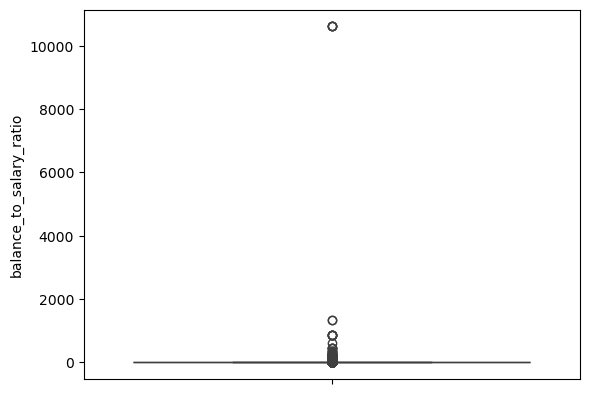

In [60]:
sns.boxplot(df.balance_to_salary_ratio);

In [61]:
round(df['balance_to_tenure_ratio'].describe(),2)

count     15926.00
mean      20271.52
std       25947.85
min           0.00
25%           0.00
50%       14150.89
75%       25857.25
max      197041.80
Name: balance_to_tenure_ratio, dtype: float64

Axes(0.125,0.11;0.775x0.77)


exited,0,1
is_high_credit_low_balance,,
0,6995,7390
1,968,573


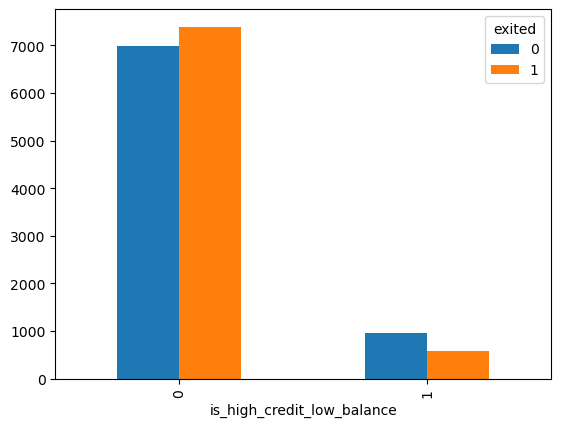

In [62]:
print(df.groupby(['is_high_credit_low_balance','exited']).size().unstack().plot(kind='bar'))
df.groupby(['is_high_credit_low_balance','exited']).size().unstack()

In [63]:
# age_group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'], right=False)

# years_until_retirement
df['years_until_retirement'] = np.maximum(60 - df['age'], 0)

# is_new_customer
df['is_new_customer'] = np.where(df['tenure'] <= 1, 1, 0)

# loyalty_score
df['loyalty_score'] = (df['tenure'] * 0.4) + (df['numofproducts'] * 0.3) + (df['isactivemember'] * 0.3)

In [64]:
df.sample(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,credit_score_category,balance_to_salary_ratio,balance_to_tenure_ratio,is_high_credit_low_balance,age_group,years_until_retirement,is_new_customer,loyalty_score
9375,659,Germany,Male,48,4,123593.22,2,1,0,82469.06,1,Good,1.50,24718.64,0,Middle-aged,12,0,2.2
9390,752,Germany,Female,37,5,113291.05,2,1,1,132467.54,0,Excellent,0.86,18881.84,0,Middle-aged,23,0,2.9
6872,850,France,Female,27,7,43658.33,2,1,1,3025.49,0,Excellent,14.43,5457.29,0,Young,33,0,3.7
13197,539,Spain,Male,38,6,0.00,1,1,1,152880.07,1,Poor,0.00,0.00,0,Middle-aged,22,0,3.0
12651,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1,Fair,2.84,18574.98,0,Middle-aged,13,0,3.0


Axes(0.125,0.11;0.775x0.77)


exited,0,1
age_group,,
Young,1517,485
Middle-aged,5685,5018
Senior,761,2460


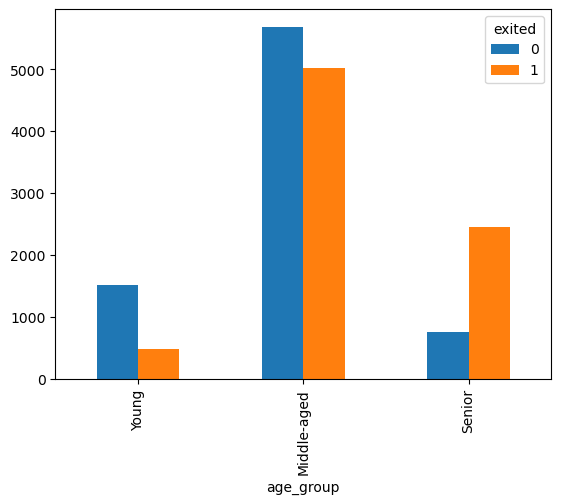

In [65]:
print(df.groupby(['age_group','exited']).size().unstack().plot(kind='bar'))
df.groupby(['age_group','exited']).size().unstack()

Axes(0.125,0.11;0.775x0.77)


exited,0,1
is_new_customer,,
0,6842,6637
1,1121,1326


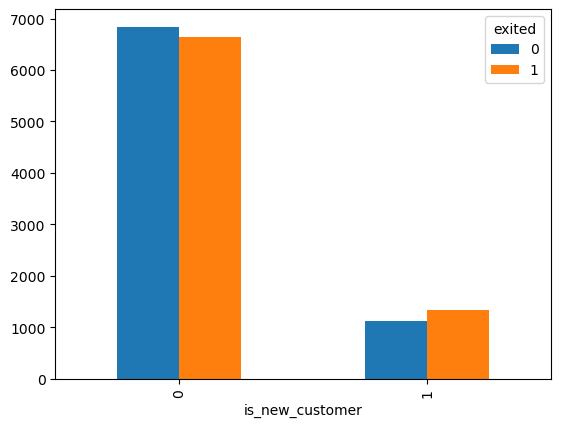

In [66]:
print(df.groupby(['is_new_customer','exited']).size().unstack().plot(kind='bar'))
df.groupby(['is_new_customer','exited']).size().unstack()

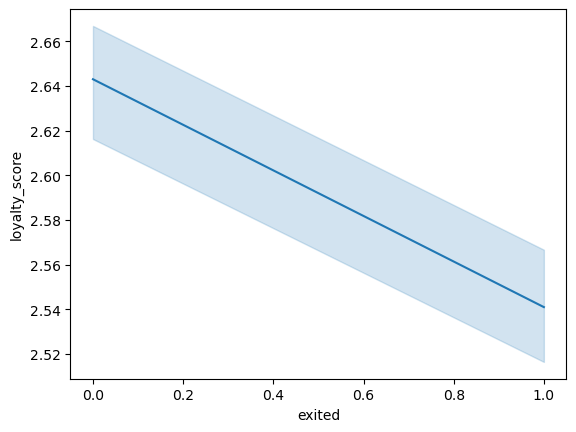

In [67]:
sns.lineplot(x=df.exited, y=df.loyalty_score);

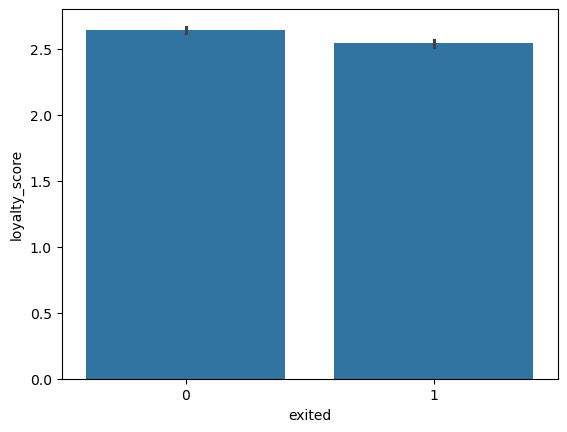

In [68]:
sns.barplot(x=df.exited, y=df.loyalty_score);

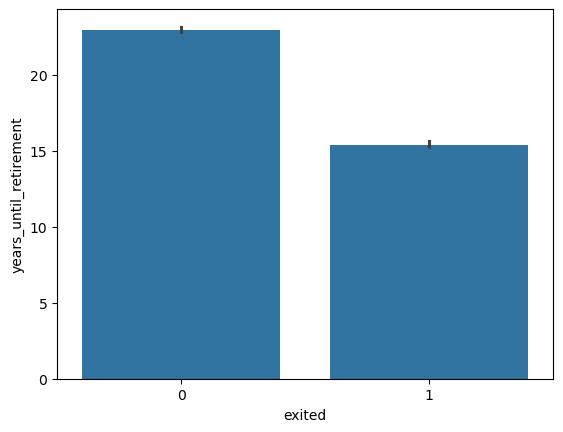

In [69]:
sns.barplot(x=df.exited, y=df.years_until_retirement);

In [70]:
# has_multiple_products
df['has_multiple_products'] = np.where(df['numofproducts'] > 1, 1, 0)

# credit_card_usage
df['credit_card_usage'] = np.where((df['hascrcard'] == 1) & (df['isactivemember'] == 1), 1, 0)

In [71]:
df[['has_multiple_products','credit_card_usage', 'exited']].sample(5)

,has_multiple_products,credit_card_usage,exited
39,1,0,0
7085,1,1,0
14936,0,0,1
6623,0,1,0
5348,0,0,1


Axes(0.125,0.11;0.775x0.77)


exited,0,1
has_multiple_products,,
0,3675,5478
1,4288,2485


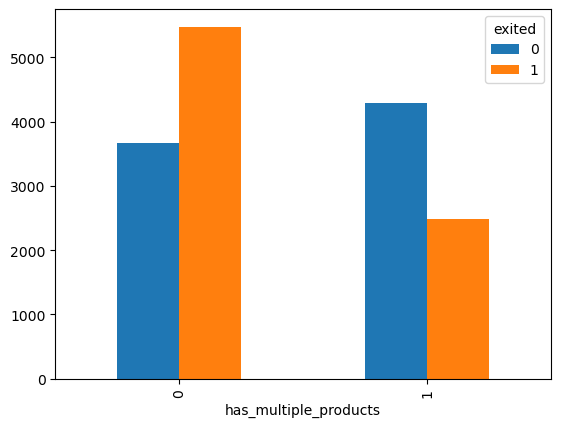

In [72]:
print(df.groupby(['has_multiple_products','exited']).size().unstack().plot(kind='bar'))
df.groupby(['has_multiple_products','exited']).size().unstack()

Axes(0.125,0.11;0.775x0.77)


exited,0,1
credit_card_usage,,
0,4838,6040
1,3125,1923


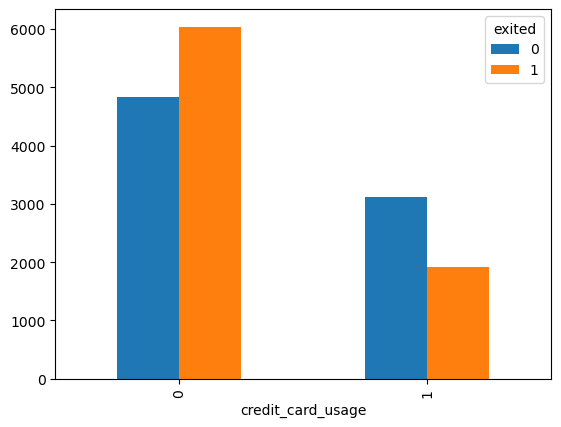

In [73]:
print(df.groupby(['credit_card_usage','exited']).size().unstack().plot(kind='bar'))
df.groupby(['credit_card_usage','exited']).size().unstack()

In [74]:

# estimated_salary_decile
df['estimated_salary_decile'] = pd.qcut(df['estimatedsalary'], 10, labels=False)

# customer_value_score
df['customer_value_score'] = round((df['balance'] * 0.5) + (df['numofproducts'] * 0.3) + (df['tenure'] * 0.2),2)

In [75]:
df[['estimated_salary_decile','customer_value_score','exited']].sample(5)

,estimated_salary_decile,customer_value_score,exited
15578,8,76399.65,1
9225,8,60038.88,0
13162,4,69814.77,1
3502,5,53173.18,1
15830,6,20459.08,1


Axes(0.125,0.11;0.775x0.77)


exited,0,1
estimated_salary_decile,,
0,825,768
1,796,797
2,784,813
3,798,792
4,795,799
5,795,794
6,831,761
7,796,797
8,758,837


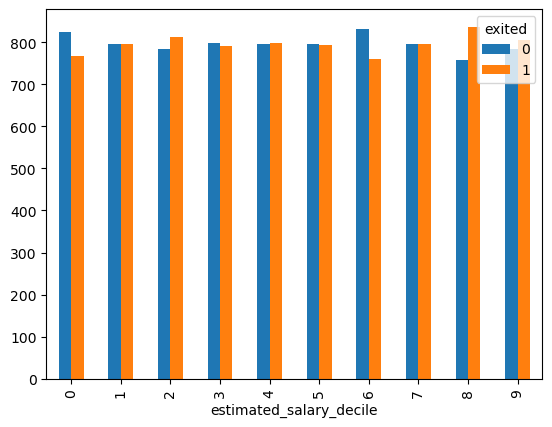

In [76]:
print(df.groupby(['estimated_salary_decile','exited']).size().unstack().plot(kind='bar'))
df.groupby(['estimated_salary_decile','exited']).size().unstack()

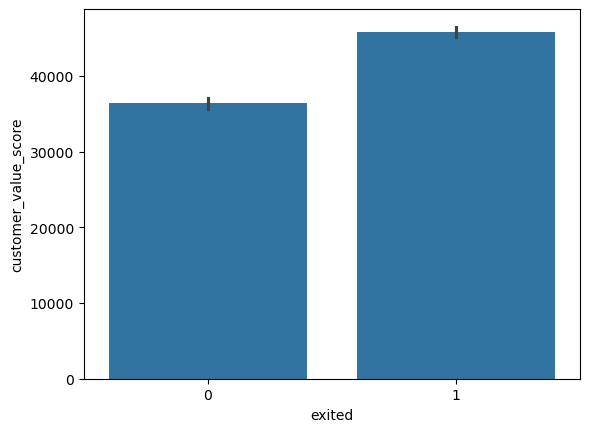

In [77]:
sns.barplot(x=df.exited, y=df.customer_value_score);

In [78]:
round(df['customer_value_score'].describe(),2)

count     15926.00
mean      41126.55
std       30691.55
min           0.30
25%           2.10
50%       51911.93
75%       64669.12
max      125450.54
Name: customer_value_score, dtype: float64

In [79]:
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'credit_score_category', 'balance_to_salary_ratio',
       'balance_to_tenure_ratio', 'is_high_credit_low_balance', 'age_group',
       'years_until_retirement', 'is_new_customer', 'loyalty_score',
       'has_multiple_products', 'credit_card_usage', 'estimated_salary_decile',
       'customer_value_score'],
      dtype='object')

In [80]:
df.corr(numeric_only=True)['exited'].sort_values(ascending=False) # With numerical columns only 

exited                        1.000000
age                           0.351546
balance                       0.154850
customer_value_score          0.154850
balance_to_tenure_ratio       0.098824
is_new_customer               0.035695
balance_to_salary_ratio       0.020145
estimatedsalary               0.010040
estimated_salary_decile       0.009859
tenure                       -0.011141
hascrcard                    -0.011803
creditscore                  -0.039442
loyalty_score                -0.042556
numofproducts                -0.046593
is_high_credit_low_balance   -0.083896
credit_card_usage            -0.162207
isactivemember               -0.190756
has_multiple_products        -0.228994
years_until_retirement       -0.383659
Name: exited, dtype: float64

In [81]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)

geography
gender
credit_score_category


In [82]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select categorical columns
categorical_cols = ['geography', 'gender', 'hascrcard', 'isactivemember']  # Add other categorical columns

# Create a function to compute the Chi-Square test for 'exited' vs each categorical variable
def chi_square_target_corr(df, categorical_cols, target_col='exited'):
    chi_square_results = {}
    
    for col in categorical_cols:
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi_square_results[col] = p
        
    return chi_square_results

# Calculate Chi-Square p-values for all categorical variables with respect to 'exited'
chi_square_results = chi_square_target_corr(df, categorical_cols)
print(chi_square_results)

{'geography': 7.66787844026564e-143, 'gender': 7.635167225008673e-51, 'hascrcard': 0.14095272370286605, 'isactivemember': 7.019409034652056e-128}


## Based on the results of the Chi-Square Test (p-values):

### geography: The p-value is extremely small (7.67 × 10^-143), indicating a very strong relationship with the target (exited). This means the customer's geography has a significant influence on whether they exit or not.

### gender: The p-value is also very small (7.64 × 10^-51), suggesting a significant relationship between gender and whether the customer exits or not.

### hascrcard: The p-value is 0.141, which is greater than 0.05. This indicates that there is no significant relationship between having a credit card (hascrcard) and exiting the service (exited).

### isactivemember: The p-value is extremely small (7.02 × 10^-128), showing a very strong relationship between whether a customer is an active member and whether they exit.

In [84]:
df.sample(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,...,balance_to_tenure_ratio,is_high_credit_low_balance,age_group,years_until_retirement,is_new_customer,loyalty_score,has_multiple_products,credit_card_usage,estimated_salary_decile,customer_value_score
12316,517,Germany,Female,59,8,154110.99,2,1,0,101240.08,...,17123.44,0,Senior,1,0,3.8,1,0,5,77057.70
9046,630,Germany,Female,23,4,137964.51,1,0,1,174570.55,...,27592.90,0,Young,37,0,2.2,0,0,8,68983.36
9813,590,Spain,Female,29,10,99250.08,1,1,1,129629.41,...,9022.73,0,Young,31,0,4.6,0,1,6,49627.34


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   creditscore                 15926 non-null  int64   
 1   geography                   15926 non-null  object  
 2   gender                      15926 non-null  object  
 3   age                         15926 non-null  int64   
 4   tenure                      15926 non-null  int64   
 5   balance                     15926 non-null  float64 
 6   numofproducts               15926 non-null  int64   
 7   hascrcard                   15926 non-null  int64   
 8   isactivemember              15926 non-null  int64   
 9   estimatedsalary             15926 non-null  float64 
 10  exited                      15926 non-null  int64   
 11  credit_score_category       15926 non-null  object  
 12  balance_to_salary_ratio     15926 non-null  float64 
 13  balance_to_tenur

In [86]:
df.select_dtypes(include=['object']).sample(3)

,geography,gender,credit_score_category
5160,France,Male,Poor
4875,France,Female,Fair
2922,Spain,Male,Good


### Here, Geography, Gender, & age_group are Nominal categorical data and Credt_score_Category is Ordinal categorical data.

### So, Ordinal Encoding should be applied by Credit_Score_Category and One hot encoding technique on rest three cate variables.

In [88]:
# Splitting the data

from sklearn.model_selection import train_test_split

X = df.drop(columns=['exited'])
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11944, 22), (3982, 22), (11944,), (3982,))

In [90]:
X_train.credit_score_category.value_counts()

credit_score_category
Good         4052
Fair         4016
Poor         2013
Excellent    1863
Name: count, dtype: int64

In [91]:
X_train.age_group.value_counts()

age_group
Middle-aged    8029
Senior         2415
Young          1500
Name: count, dtype: int64

In [92]:
credit_score_order = ['Poor', 'Fair', 'Good', 'Excellent']


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['geography', 'gender','age_group']),  # One-Hot Encoding
        ('ordinal', OrdinalEncoder(categories=[credit_score_order]), ['credit_score_category'])  # Ordinal Encoding
    ],
    remainder='passthrough'  # Keep other columns
)


In [93]:
# Fit only on training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)  # Transform test data using the same fitted transformer

In [94]:
# Get feature names from the transformers
onehot_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(['geography', 'gender','age_group']).tolist()
ordinal_columns = ['credit_score_category']
passthrough_columns = X_train.select_dtypes(exclude=['object','category']).columns.tolist()  # Numerical columns

# Combine all column names
columns = onehot_columns + ordinal_columns + passthrough_columns

columns

['geography_Germany',
 'geography_Spain',
 'gender_Male',
 'age_group_Senior',
 'age_group_Young',
 'credit_score_category',
 'creditscore',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'balance_to_salary_ratio',
 'balance_to_tenure_ratio',
 'is_high_credit_low_balance',
 'years_until_retirement',
 'is_new_customer',
 'loyalty_score',
 'has_multiple_products',
 'credit_card_usage',
 'estimated_salary_decile',
 'customer_value_score']

In [95]:
# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_transformed, columns=columns)
X_test_df = pd.DataFrame(X_test_transformed, columns=columns)

X_train_df.sample(3)

,geography_Germany,geography_Spain,gender_Male,age_group_Senior,age_group_Young,credit_score_category,creditscore,age,tenure,balance,...,balance_to_salary_ratio,balance_to_tenure_ratio,is_high_credit_low_balance,years_until_retirement,is_new_customer,loyalty_score,has_multiple_products,credit_card_usage,estimated_salary_decile,customer_value_score
2494,0.0,0.0,0.0,0.0,0.0,1.0,611.0,49.0,2.0,88915.37,...,0.55,29638.46,0.0,11.0,0.0,1.7,1.0,0.0,8.0,44458.98
5209,1.0,0.0,1.0,0.0,0.0,2.0,749.0,47.0,9.0,110022.74,...,0.81,11002.27,0.0,13.0,0.0,4.2,0.0,0.0,6.0,55013.47
4436,1.0,0.0,1.0,1.0,0.0,3.0,775.0,51.0,2.0,123783.25,...,0.92,41261.08,0.0,9.0,0.0,1.4,0.0,1.0,6.0,61892.32


In [96]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11944 entries, 0 to 11943
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   geography_Germany           11944 non-null  float64
 1   geography_Spain             11944 non-null  float64
 2   gender_Male                 11944 non-null  float64
 3   age_group_Senior            11944 non-null  float64
 4   age_group_Young             11944 non-null  float64
 5   credit_score_category       11944 non-null  float64
 6   creditscore                 11944 non-null  float64
 7   age                         11944 non-null  float64
 8   tenure                      11944 non-null  float64
 9   balance                     11944 non-null  float64
 10  numofproducts               11944 non-null  float64
 11  hascrcard                   11944 non-null  float64
 12  isactivemember              11944 non-null  float64
 13  estimatedsalary             119

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train_df)

# Transform the test data using the same scaler (do not fit on test data)
X_test_scaled = scaler.transform(X_test_df)

# If you want to convert them back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_df.columns)

# Display the first few rows of scaled data
print("Scaled Training Data:")
X_train_scaled_df.head()

Scaled Training Data:


,geography_Germany,geography_Spain,gender_Male,age_group_Senior,age_group_Young,credit_score_category,creditscore,age,tenure,balance,...,balance_to_salary_ratio,balance_to_tenure_ratio,is_high_credit_low_balance,years_until_retirement,is_new_customer,loyalty_score,has_multiple_products,credit_card_usage,estimated_salary_decile,customer_value_score
0,-0.659590,-0.553235,-1.027505,-0.503425,-0.378976,-1.563976,-1.132162,-0.299643,1.036661,0.106908,...,-0.015573,-0.401087,-0.327347,0.290052,-0.425779,1.017672,1.165794,-0.683214,-1.215529,0.106933
1,1.516092,-0.553235,0.973232,1.986393,-0.378976,1.600538,1.084271,1.494594,-1.021041,0.308594,...,-0.025630,0.504147,-0.327347,-1.640982,-0.425779,-0.737368,1.165794,1.463670,-0.517468,0.308580
2,-0.659590,-0.553235,0.973232,-0.503425,-0.378976,-1.563976,-1.768360,-0.394077,-0.335140,-1.339563,...,-0.034041,-0.775415,-0.327347,0.391685,-0.425779,-0.319501,-0.857784,1.463670,-0.866498,-1.339576
3,-0.659590,-0.553235,0.973232,-0.503425,-0.378976,-0.509138,-0.537008,0.078091,0.693710,-1.339563,...,-0.034041,-0.775415,-0.327347,-0.116482,-0.425779,0.934099,1.165794,1.463670,0.529624,-1.339546
4,-0.659590,-0.553235,0.973232,-0.503425,-0.378976,0.545700,0.560947,-0.394077,-1.363991,1.101053,...,0.008660,2.066778,-0.327347,0.391685,2.348637,-1.573101,-0.857784,-0.683214,-1.564560,1.101023


In [98]:
print("\nScaled Test Data:")
X_test_scaled_df.head()


Scaled Test Data:


,geography_Germany,geography_Spain,gender_Male,age_group_Senior,age_group_Young,credit_score_category,creditscore,age,tenure,balance,...,balance_to_salary_ratio,balance_to_tenure_ratio,is_high_credit_low_balance,years_until_retirement,is_new_customer,loyalty_score,has_multiple_products,credit_card_usage,estimated_salary_decile,customer_value_score
0,-0.659590,-0.553235,-1.027505,-0.503425,2.638687,-1.563976,-1.162945,-1.149545,0.007810,-1.339563,...,-0.034041,-0.775415,-0.327347,1.204752,-0.425779,0.265512,1.165794,-0.683214,-0.866498,-1.339559
1,1.516092,-0.553235,-1.027505,-0.503425,-0.378976,-0.509138,-0.434396,-0.016342,-0.335140,0.822518,...,-0.029041,0.231717,-0.327347,-0.014848,-0.425779,-0.570221,-0.857784,-0.683214,0.878655,0.822508
2,-0.659590,1.807550,-1.027505,-0.503425,-0.378976,0.545700,0.324938,-0.960678,1.379611,0.613192,...,-0.027100,-0.320603,-0.327347,1.001485,-0.425779,1.602685,1.165794,1.463670,0.180594,0.613224
3,-0.659590,-0.553235,-1.027505,-0.503425,-0.378976,0.545700,0.448073,-0.488510,-0.335140,-1.339563,...,-0.034041,-0.775415,-0.327347,0.493318,-0.425779,-0.570221,-0.857784,-0.683214,1.576716,-1.339576
4,1.516092,-0.553235,-1.027505,-0.503425,-0.378976,0.545700,0.386505,-0.205210,-0.335140,1.230929,...,-0.028336,0.421961,-0.327347,0.188418,-0.425779,-0.319501,1.165794,-0.683214,1.227685,1.230929


## DL Model Building

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [101]:
# Build the neural network model
model = Sequential()

# Add input layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
Dropout(0.3),  # 30% of the neurons are dropped during training

# Add another hidden layer
model.add(Dense(64, activation='relu'))
Dropout(0.4),  # 40% of the neurons are dropped during training

# Add output layer with a sigmoid activation function (for binary classification)
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [105]:
# Train the model
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6885 - loss: 0.5964 - val_accuracy: 0.7417 - val_loss: 0.5144
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7557 - loss: 0.5092 - val_accuracy: 0.7618 - val_loss: 0.4879
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7797 - loss: 0.4686 - val_accuracy: 0.7748 - val_loss: 0.4681
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7895 - loss: 0.4499 - val_accuracy: 0.7853 - val_loss: 0.4581
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4400 - val_accuracy: 0.7807 - val_loss: 0.4516
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 0.4319 - val_accuracy: 0.7832 - val_loss: 0.4489
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8014 - loss: 0.4272 - val_accuracy: 0.7819 - val_loss: 0.4421
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4128 - val_accu

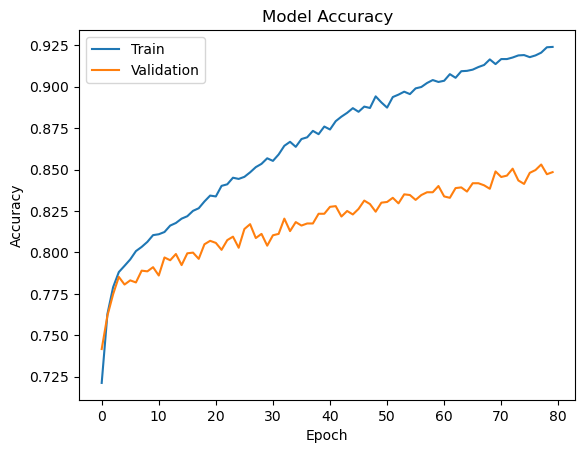

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

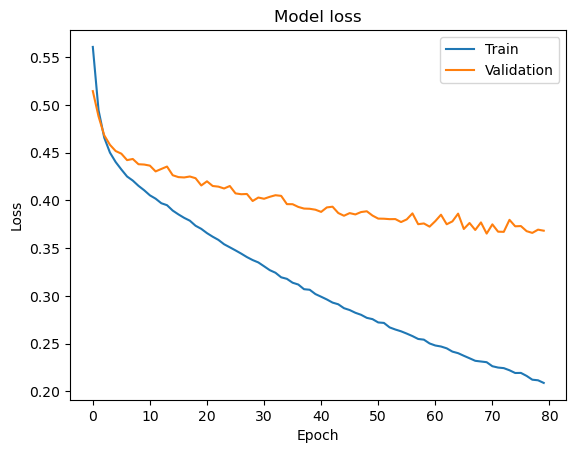

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [108]:
# Evaluate the model
model.evaluate(X_test_scaled, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8540 - loss: 0.3698


[0.37500861287117004, 0.8488196730613708]

In [109]:
y_pred = model.predict(X_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [110]:
y_pred

array([[3.8994034e-04],
       [6.1529469e-01],
       [1.7674631e-02],
       ...,
       [5.8377039e-01],
       [8.8492119e-01],
       [9.6057963e-01]], dtype=float32)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = (y_pred > 0.5) if len(y_pred.shape) == 2 and y_pred.shape[1] == 1 else y_pred.argmax(axis=1)

# Calculate classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2036
           1       0.83      0.87      0.85      1946

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982

Confusion Matrix:
[[1688  348]
 [ 254 1692]]
Accuracy: 0.8488196885986942
